In [1]:
print("hello world")

hello world


In [1]:
from datasets import load_dataset
import pandas as pd

In [17]:
import torch

In [ ]:
df = pd.DataFrame(headers=['file_name', 'type'])

In [3]:
test= [];

In [4]:
import os
import json
os.walk("C:\\Users\\grins\\.cache\\huggingface\\hub\\datasets--DrBimmer--car-parts-and-damage-dataset\\snapshots\\2dbf46f7e23eb0d6f551d38e4f77a11fe9d045b9\\Car parts dataset\\File1\\ann")
for root, dirs, files in os.walk("C:\\Users\\grins\\.cache\\huggingface\\hub\\datasets--DrBimmer--car-parts-and-damage-dataset\\snapshots\\2dbf46f7e23eb0d6f551d38e4f77a11fe9d045b9\\Car parts dataset\\File1\\ann"):
    for file in files:
        dirs = os.path.join(root, file)
        with open(dirs, 'r') as f:
            data = json.load(f)
            for i,j in enumerate(data['objects']):
                test.append({"file_name": file, "type": j['classTitle'],"index": i})
                

In [5]:
df = pd.DataFrame(test)
df

,file_name,type,index
0,Car damages 101.png.json,Broken part,0
1,Car damages 101.png.json,Scratch,1
2,Car damages 101.png.json,Dent,2
3,Car damages 101.png.json,Broken part,3
4,Car damages 101.png.json,Broken part,4
...,...,...,...
9079,Car damages 999.png.json,Dent,3
9080,Car damages 999.png.json,Broken part,4
9081,Car damages 999.png.json,Dent,5
9082,Car damages 999.png.json,Missing part,6


In [6]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection

processor = AutoImageProcessor.from_pretrained("ArrayDice/Vehicle_Detection_Model")
model = AutoModelForObjectDetection.from_pretrained("ArrayDice/Vehicle_Detection_Model")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

a:\insurance_claim_project\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\grins\.cache\huggingface\hub\models--timm--resnet50.a1_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
a:\insurance_claim_project\.venv\Lib\site-packages\torch\nn\modules\module.py:2446: UserWarning: for conv1.weight:

In [9]:
from PIL import Image

In [12]:
from transformers import DetrImageProcessor

In [13]:
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")


preprocessor_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

a:\insurance_claim_project\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\grins\.cache\huggingface\hub\models--facebook--detr-resnet-50. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [ ]:
image  = Image.open("C:\\Users\\grins\\.cache\\huggingface\\hub\\datasets--DrBimmer--car-parts-and-damage-dataset\\snapshots\\2dbf46f7e23eb0d6f551d38e4f77a11fe9d045b9\\Car parts dataset\\File1\\img\\Car damages 101.png")

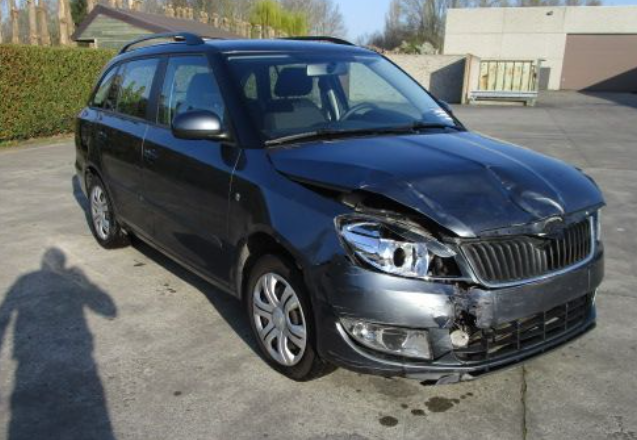

In [29]:
image

In [46]:
image  = Image.open("C:\\Users\\grins\\.cache\\huggingface\\hub\\datasets--DrBimmer--car-parts-and-damage-dataset\\snapshots\\2dbf46f7e23eb0d6f551d38e4f77a11fe9d045b9\\Car parts dataset\\File1\\img\\Car damages 101.png").convert("RGB")
model.eval()
inputs = processor(images=image, return_tensors="pt")

In [47]:
inputs = inputs.pixel_values

In [48]:
inputs.shape

torch.Size([1, 3, 800, 1158])

In [49]:
image  = Image.open("C:\\Users\\grins\\.cache\\huggingface\\hub\\datasets--DrBimmer--car-parts-and-damage-dataset\\snapshots\\2dbf46f7e23eb0d6f551d38e4f77a11fe9d045b9\\Car parts dataset\\File1\\img\\Car damages 101.png").convert("RGB")
inputs = processor(images=image, return_tensors="pt")
inputs = inputs.pixel_values
model.eval()
with torch.no_grad():
    outputs = model(inputs)
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.1)[0]
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        print(
                f"Detected {model.config.id2label[label.item()]} with confidence "
                f"{round(score.item(), 3)} at location {box}"
        )

Detected car with confidence 0.346 at location [261.25, 52.42, 347.01, 81.35]
Detected pickup with confidence 0.14 at location [222.23, 232.65, 308.36, 374.14]
Detected car with confidence 0.37 at location [25.54, 246.32, 117.32, 320.86]
Detected pickup with confidence 0.21 at location [228.79, 269.55, 308.22, 373.66]
Detected car with confidence 0.157 at location [321.32, 218.34, 421.97, 273.88]
Detected car with confidence 0.736 at location [231.76, 269.59, 306.88, 367.79]
Detected pickup with confidence 0.147 at location [221.54, 236.91, 306.99, 370.57]
Detected car with confidence 0.397 at location [155.62, 102.68, 227.57, 136.89]
Detected pickup with confidence 0.258 at location [230.6, 269.46, 307.38, 368.64]
Detected car with confidence 0.124 at location [53.37, 167.9, 129.32, 249.14]
Detected car with confidence 0.408 at location [64.39, 170.25, 127.27, 247.23]
Detected pickup with confidence 0.291 at location [229.4, 268.11, 308.32, 369.51]


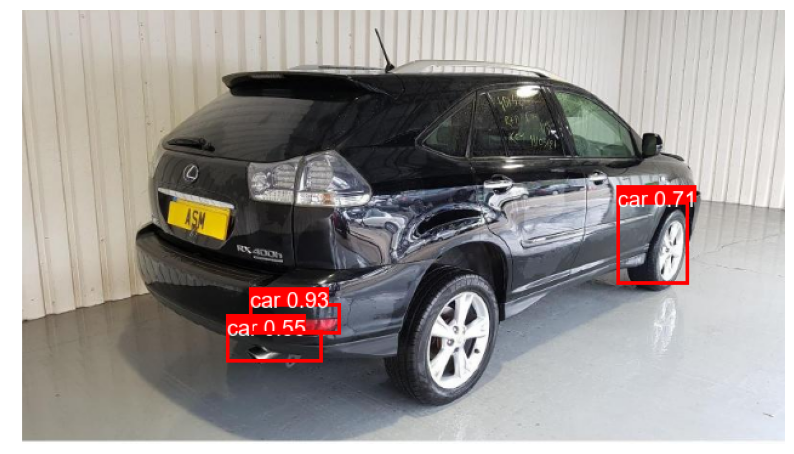

In [55]:
import torch
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Load image
image = Image.open(
    r"C:\Users\grins\.cache\huggingface\hub\datasets--DrBimmer--car-parts-and-damage-dataset\snapshots\2dbf46f7e23eb0d6f551d38e4f77a11fe9d045b9\Car parts dataset\File1\img\Car damages 109.png"
).convert("RGB")

# Preprocess
inputs = processor(images=image, return_tensors="pt")
pixel_values = inputs.pixel_values

# Inference
model.eval()
with torch.no_grad():
    outputs = model(pixel_values)
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.5)[0]

# Draw bounding boxes
draw_img = image.copy()
draw = ImageDraw.Draw(draw_img)

# Optional: font
try:
    font = ImageFont.truetype("arial.ttf", 18)
except:
    font = ImageFont.load_default()

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(v, 2) for v in box.tolist()]
    x1, y1, x2, y2 = box

    # Draw box
    draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

    # Label text
    text = f"{model.config.id2label[label.item()]} {score:.2f}"
    text_size = draw.textbbox((0, 0), text, font=font)
    tw = text_size[2] - text_size[0]
    th = text_size[3] - text_size[1]

    # Draw label background
    draw.rectangle([x1, y1 - th, x1 + tw, y1], fill="red")
    draw.text((x1, y1 - th), text, fill="white", font=font)

# Show with matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(draw_img)
plt.axis("off")
plt.show()


In [7]:
model.state_dict()

OrderedDict([('model.backbone.conv_encoder.model.conv1.weight',
              tensor([[[[ 1.3335e-02,  1.4664e-02, -1.5351e-02,  ..., -4.0896e-02,
                         -4.3034e-02, -7.0755e-02],
                        [ 4.1205e-03,  5.8477e-03,  1.4948e-02,  ...,  2.2060e-03,
                         -2.0912e-02, -3.8517e-02],
                        [ 2.2331e-02,  2.3595e-02,  1.6120e-02,  ...,  1.0281e-01,
                          6.2641e-02,  5.1977e-02],
                        ...,
                        [-9.0349e-04,  2.7767e-02, -1.0105e-02,  ..., -1.2722e-01,
                         -7.6604e-02,  7.8453e-03],
                        [ 3.5894e-03,  4.8006e-02,  6.2051e-02,  ...,  2.4267e-02,
                         -3.3662e-02, -1.5709e-02],
                        [-8.0029e-02, -3.2238e-02, -1.7808e-02,  ...,  3.5359e-02,
                          2.2439e-02,  1.7077e-03]],
              
                       [[-1.8452e-02,  1.1415e-02,  2.3850e-02,  ...,  5.3736e-02

In [6]:
ds = load_dataset("C:\Users\grins\.cache\huggingface\hub\datasets--DrBimmer--car-parts-and-damage-dataset\snapshots\2dbf46f7e23eb0d6f551d38e4f77a11fe9d045b9\Car parts dataset\File1\ann")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (605191904.py, line 1)

In [12]:
tensor = torch.tensor([1,2,3,4],device='cuda',dtype=torch.float32)

In [29]:
torch.rand([5,6],dtype=torch.float64)

tensor([[0.6594, 0.8758, 0.9802, 0.6430, 0.2611, 0.4835],
        [0.2073, 0.9634, 0.9488, 0.9642, 0.5709, 0.5673],
        [0.2981, 0.3178, 0.2298, 0.2798, 0.9164, 0.8939],
        [0.7350, 0.2702, 0.4687, 0.5389, 0.9888, 0.9353],
        [0.5289, 0.7062, 0.5836, 0.4606, 0.2171, 0.5504]], dtype=torch.float64)